In [1]:
import pickle

from fastfusion.visualization.interactive import plotly_show

from fastfusion.mapper.FFM import join_pmappings
from fastfusion.frontend import Specification
from fastfusion.mapper.metrics import Metrics
from pathlib import Path

ARCH_DIR = Path("/home/fastfusion/fastfusion/notebooks/architecture")
WORKLOAD_DIR = Path("/home/fastfusion/fastfusion/notebooks/workloads")
PMAPPINGS_DIR = Path("/home/fastfusion/fastfusion/notebooks/pmappings")

In [2]:
   
from pathlib import Path
import pickle

from fastfusion.frontend import Specification
from fastfusion.mapper.FFM import make_pmappings, join_pmappings
from fastfusion.mapper.metrics import Metrics

for shape in ['7']: #['7', '14', '28']:
    PMAPPINGS_PATH = PMAPPINGS_DIR / f"mobilenet/{shape}.pkl"

    spec = Specification.from_yaml(
        ARCH_DIR / "snowcat.arch.yaml",
        WORKLOAD_DIR / f"mobilenet_{shape}.workload.yaml",
    )
    spec.mapper.ffm.metrics = Metrics.ENERGY | Metrics.RESOURCE_USAGE
    spec.calculate_component_energy_area(area=False)

    if PMAPPINGS_PATH.exists():
        with open(PMAPPINGS_PATH, "rb") as f:
            pmappings = pickle.load(f)
    else:
        pmappings = make_pmappings(spec)

        with open(PMAPPINGS_PATH, "wb") as f:
            pickle.dump(pmappings, f)


#     joined = join_pmappings(spec, pmappings)
# 
#     with open(JOINED_PATH, "wb") as f:
#         pickle.dump(joined, f)

WARNING Loading configuration file from /root/.config/fastfusion/config.yaml


In [3]:
def get_pmappings(shape):
    """shape is 7, 14, or 28."""
    pmappings_path = PMAPPINGS_DIR / f"mobilenet/{shape}.pkl"
    with open(pmappings_path, "rb") as f:
        pmappings = pickle.load(f)
    return pmappings

def get_pmappings_even(shape):
    """shape is 7, 14, or 28."""
    pmappings_path = PMAPPINGS_DIR / f"mobilenet/even_{shape}.pkl"
    with open(pmappings_path, "rb") as f:
        pmappings = pickle.load(f)
    return pmappings

def get_specs(shape):
    arch_path = ARCH_DIR / "snowcat.arch.yaml"
    workload_path = WORKLOAD_DIR / f"mobilenet_{shape}.workload.yaml"
    spec = Specification.from_yaml(arch_path, workload_path)
    spec.mapper.ffm.metrics = Metrics.ENERGY | Metrics.RESOURCE_USAGE
    return spec

In [4]:
OCCUPANCY = 'RESOURCE_GlobalBuffer_LEVEL_0'
ENERGY = 'Total_Energy'

SHAPE = 14

spec = get_specs(SHAPE)
pmappings = get_pmappings(SHAPE)
# pmappings.drop_einsums("PwiseA0", "PwiseB2")
joined_loopforest = join_pmappings(spec, pmappings)
data_loopforest = joined_loopforest.data[[ENERGY, OCCUPANCY]]

def filter_non_hybrid(pm):
    return len(set(len(x.loops) for x in pm.compatibility.tensors if x.resource_name != "MainMemory")) <= 1

pmappings = get_pmappings(SHAPE)
# pmappings.drop_einsums("PwiseA0", "PwiseB2")
pmappings._filter(filter_non_hybrid)
joined_looptree = join_pmappings(spec, pmappings)
data_looptree = joined_looptree.data[[ENERGY, OCCUPANCY]]

joined_tileflow = joined_looptree
data_tileflow = joined_tileflow.data[[ENERGY, OCCUPANCY]]

# pmappings = get_pmappings_even(SHAPE)
# pmappings._filter(filter_non_hybrid)
# joined_tileflow = join_pmappings(spec, pmappings)
# data_tileflow = joined_tileflow.data[[ENERGY, OCCUPANCY]]

WARNING Loading configuration file from /root/.config/fastfusion/config.yaml


Compressing pmappings: 100%|██████████| 6/6 [00:18<00:00,  3.14s/it]


SIM PwiseA0 tensors: {'TA0'}
SIM Dwise0 tensors: {'TA0', 'TB0'}
SIM PwiseB0 tensors: {'TB0', 'T1'}
SIM PwiseA1 tensors: {'TA1', 'T1'}
SIM Dwise1 tensors: {'TB1', 'TA1'}
SIM PwiseB2 tensors: {'TB1'}


Grouping Partial Mappings: 100%|██████████| 220/220 [00:00<00:00, 1578.32it/s]


Initial consolidate and group: 13.57 seconds

Einsum Dwise0 (2/6)


Merging mappings PwiseA0 <--> Dwise0:  90%|█████████ | 1857/2062 [00:01<00:00, 2363.71it/s]

Mapping merging: 1.25 seconds
	Combining 2442(896) x 531(293) -> 2062
	Number of groups for Einsum Dwise0: 2062
	Number of mappings for Einsum Dwise0: 177774
	Mappings per group for Einsum Dwise0: 86.21435499515034
	Largest left: 43
	Largest right: 17

Einsum PwiseB0 (3/6)


Merging mappings PwiseA0 <--> Dwise0: 100%|██████████| 2062/2062 [00:01<00:00, 1161.79it/s]


Mapping merging: 4.91 seconds
	Combining 2442(896) x 2442(896) -> 3469
	Number of groups for Einsum PwiseB0: 3469
	Number of mappings for Einsum PwiseB0: 421248
	Mappings per group for Einsum PwiseB0: 121.4321130008648
	Largest left: 408
	Largest right: 27

Einsum PwiseA1 (4/6)


Merging mappings PwiseB0 <--> PwiseA1:  68%|██████▊   | 429/634 [00:00<00:00, 588.06it/s] 

Mapping merging: 1.50 seconds
	Combining 1164(428) x 1164(428) -> 634
	Number of groups for Einsum PwiseA1: 634
	Number of mappings for Einsum PwiseA1: 36346
	Mappings per group for Einsum PwiseA1: 57.32807570977918
	Largest left: 1499
	Largest right: 43

Einsum Dwise1 (5/6)


Merging mappings PwiseB0 <--> PwiseA1: 100%|██████████| 634/634 [00:01<00:00, 574.88it/s]


Mapping merging: 2.93 seconds
	Combining 15(17) x 531(293) -> 2062
	Number of groups for Einsum Dwise1: 2062
	Number of mappings for Einsum Dwise1: 1370661
	Mappings per group for Einsum Dwise1: 664.7240543161979
	Largest left: 4332
	Largest right: 17

Einsum PwiseB2 (6/6)


Merging mappings Dwise1 <--> PwiseB2:  87%|████████▋ | 783/896 [00:00<00:00, 1106.35it/s]

Mapping merging: 3.74 seconds
	Combining 2442(896) x 2442(896) -> 896
	Number of groups for Einsum PwiseB2: 896
	Number of mappings for Einsum PwiseB2: 62649
	Mappings per group for Einsum PwiseB2: 69.92075892857143
	Largest left: 3218
	Largest right: 27


Merging mappings Dwise1 <--> PwiseB2: 100%|██████████| 896/896 [00:03<00:00, 285.92it/s] 



======== Total time ========
Initial consolidate and group: 13.57 seconds
Mapping merging: 14.33 seconds

Total: 27.90 seconds



Compressing pmappings: 100%|██████████| 6/6 [00:10<00:00,  1.79s/it]


SIM PwiseA0 tensors: {'TA0'}
SIM Dwise0 tensors: {'TA0', 'TB0'}
SIM PwiseB0 tensors: {'TB0', 'T1'}
SIM PwiseA1 tensors: {'TA1', 'T1'}
SIM Dwise1 tensors: {'TB1', 'TA1'}
SIM PwiseB2 tensors: {'TB1'}


Grouping Partial Mappings: 100%|██████████| 220/220 [00:00<00:00, 1626.94it/s]


Initial consolidate and group: 4.97 seconds

Einsum Dwise0 (2/6)


Merging mappings PwiseA0 <--> Dwise0:  80%|███████▉  | 742/928 [00:00<00:00, 2045.47it/s]

Mapping merging: 0.75 seconds
	Combining 2442(896) x 469(261) -> 928
	Number of groups for Einsum Dwise0: 928
	Number of mappings for Einsum Dwise0: 175346
	Mappings per group for Einsum Dwise0: 188.95043103448276
	Largest left: 43
	Largest right: 17

Einsum PwiseB0 (3/6)


Merging mappings PwiseA0 <--> Dwise0: 100%|██████████| 928/928 [00:00<00:00, 1498.86it/s]


Mapping merging: 0.95 seconds
	Combining 2442(896) x 2442(896) -> 1348
	Number of groups for Einsum PwiseB0: 1348
	Number of mappings for Einsum PwiseB0: 108574
	Mappings per group for Einsum PwiseB0: 80.54451038575668
	Largest left: 405
	Largest right: 27

Einsum PwiseA1 (4/6)


Merging mappings PwiseB0 <--> PwiseA1:  91%|█████████ | 403/445 [00:00<00:00, 1389.03it/s]

Mapping merging: 0.84 seconds
	Combining 1164(428) x 1164(428) -> 445
	Number of groups for Einsum PwiseA1: 445
	Number of mappings for Einsum PwiseA1: 25996
	Mappings per group for Einsum PwiseA1: 58.417977528089885
	Largest left: 1277
	Largest right: 43

Einsum Dwise1 (5/6)


Merging mappings PwiseB0 <--> PwiseA1: 100%|██████████| 445/445 [00:00<00:00, 636.72it/s] 


Mapping merging: 1.42 seconds
	Combining 15(17) x 469(261) -> 928
	Number of groups for Einsum Dwise1: 928
	Number of mappings for Einsum Dwise1: 908595
	Mappings per group for Einsum Dwise1: 979.0894396551724
	Largest left: 3435
	Largest right: 17

Einsum PwiseB2 (6/6)


Merging mappings Dwise1 <--> PwiseB2:  96%|█████████▌| 860/896 [00:00<00:00, 1281.10it/s]

Mapping merging: 0.98 seconds
	Combining 2442(896) x 2442(896) -> 896
	Number of groups for Einsum PwiseB2: 896
	Number of mappings for Einsum PwiseB2: 41127
	Mappings per group for Einsum PwiseB2: 45.900669642857146
	Largest left: 2133
	Largest right: 27


Merging mappings Dwise1 <--> PwiseB2: 100%|██████████| 896/896 [00:01<00:00, 701.40it/s] 



======== Total time ========
Initial consolidate and group: 4.97 seconds
Mapping merging: 4.94 seconds

Total: 9.91 seconds



Text(0, 0.5, 'Off-chip Accesses (B)')

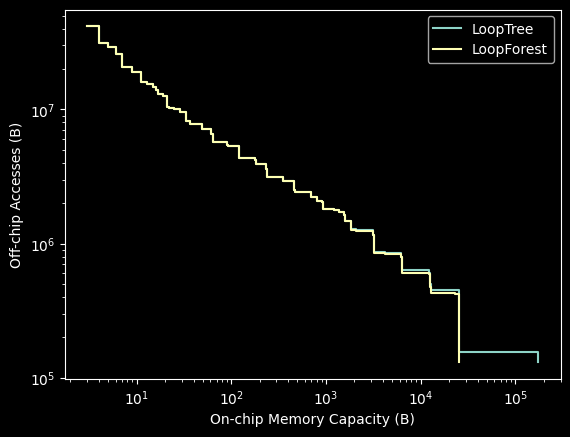

In [5]:
import matplotlib.pyplot as plt
from fastfusion.visualization.ski_slope import make_staircase
from paretoset import paretoset
import numpy as np

def plot_ski_slope(data, label, ax):
    x = data[OCCUPANCY].to_numpy()
    y = data[ENERGY].to_numpy()
    data = np.stack([x, y]).T
    mask = paretoset(data)
    data = data[mask]
    x = data[:, 0]
    y = data[:, 1]
    x, y = make_staircase(x, y)
    ax.plot(x, y, label=label)

fig, ax = plt.subplots()
# plot_ski_slope(data_tileflow, "TileFlow", ax)
plot_ski_slope(data_looptree, "LoopTree", ax)
plot_ski_slope(data_loopforest, "LoopForest", ax)

ax.set_yscale("log")
ax.set_xscale("log")
# ax.set_xlim(1e3, 1e5)
# ax.set_ylim(top=2e5)

ax.legend()

ax.set_xlabel("On-chip Memory Capacity (B)")
ax.set_ylabel("Off-chip Accesses (B)")

Merging with shared loops 1: PwiseA0 <--> Dwise0.
Merging with shared loops 1: PwiseA1 <--> Dwise1.
Merging with shared loops 0: PwiseA0,Dwise0 <--> PwiseB0.
Merging with shared loops 0: PwiseA0,Dwise0,PwiseB0 <--> PwiseA1,Dwise1.
Merging with shared loops 0: PwiseA0,Dwise0,PwiseB0,PwiseA1,Dwise1 <--> PwiseB2.


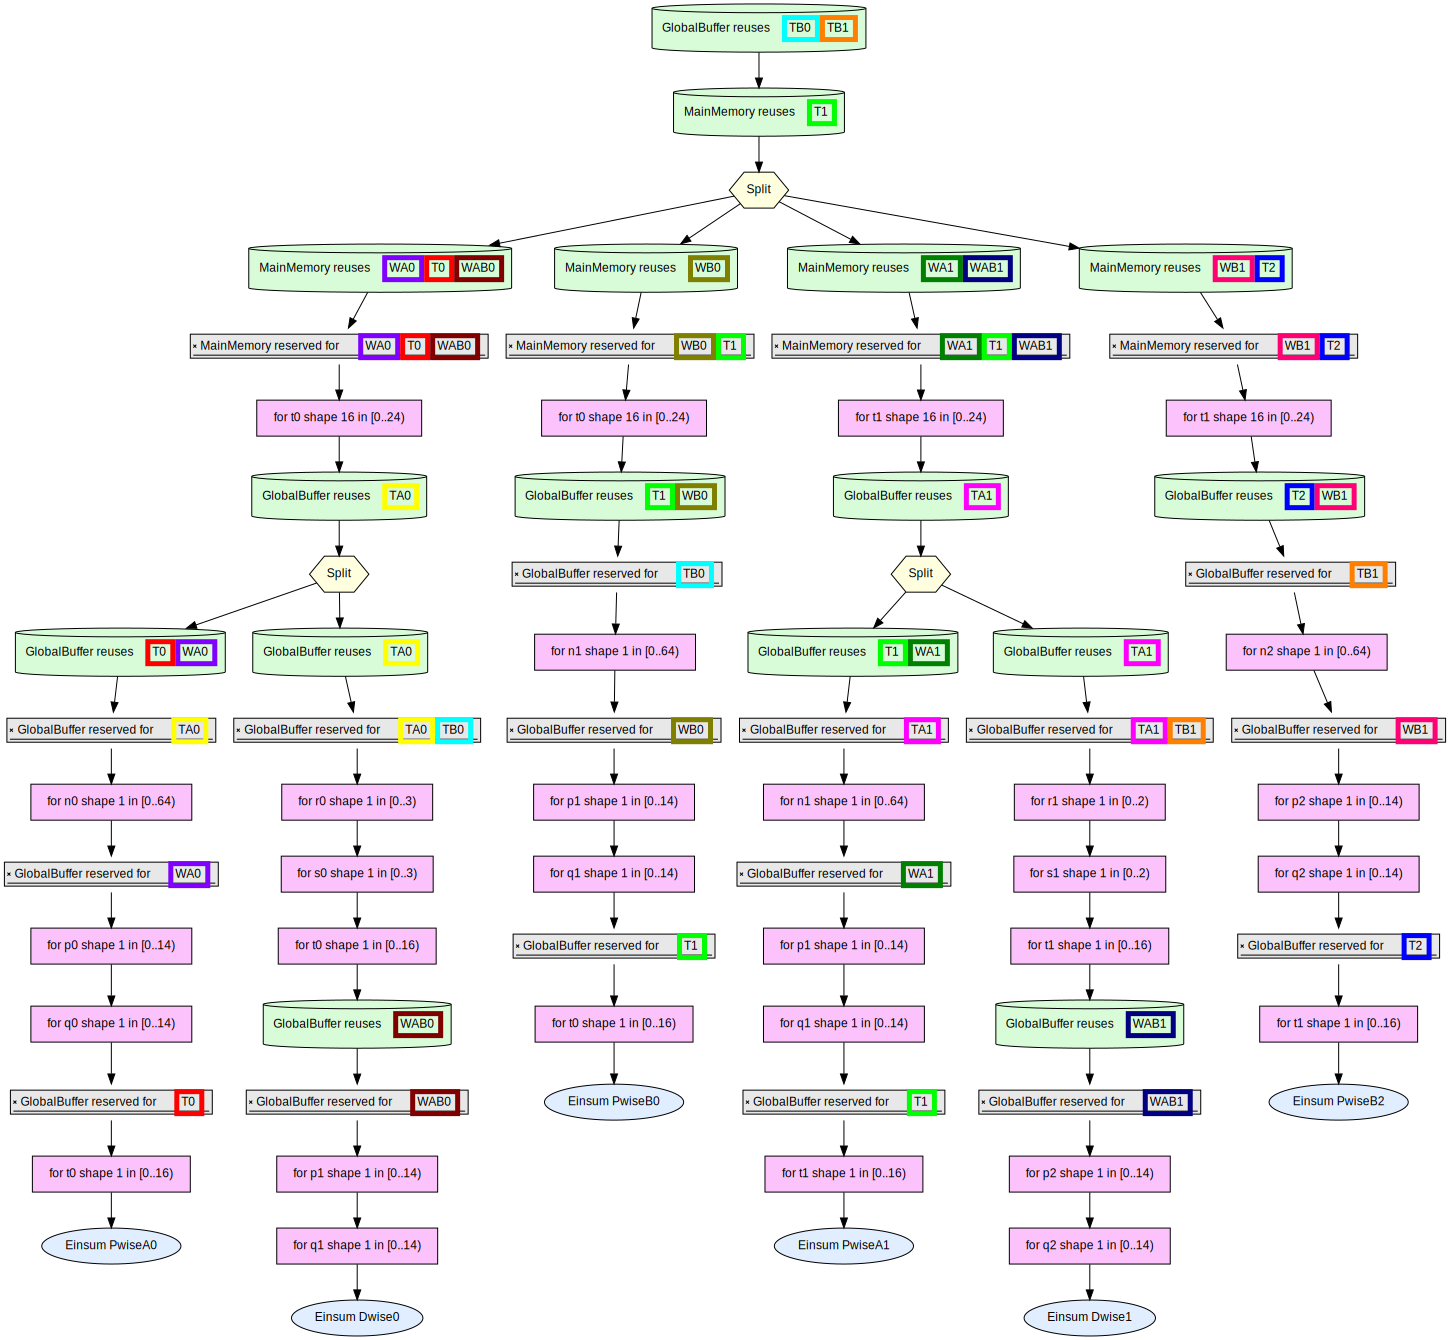

Looptree mapping has occupancy 7233.0 and energy 1886464.0
Merging with shared loops 3: Dwise0 <--> PwiseB0.
Merging with shared loops 3: Dwise1 <--> PwiseB2.
Merging with shared loops 1: PwiseA0 <--> Dwise0,PwiseB0.
Merging with shared loops 1: PwiseA1 <--> Dwise1,PwiseB2.
Merging with shared loops 0: PwiseA0,Dwise0,PwiseB0 <--> PwiseA1,Dwise1,PwiseB2.


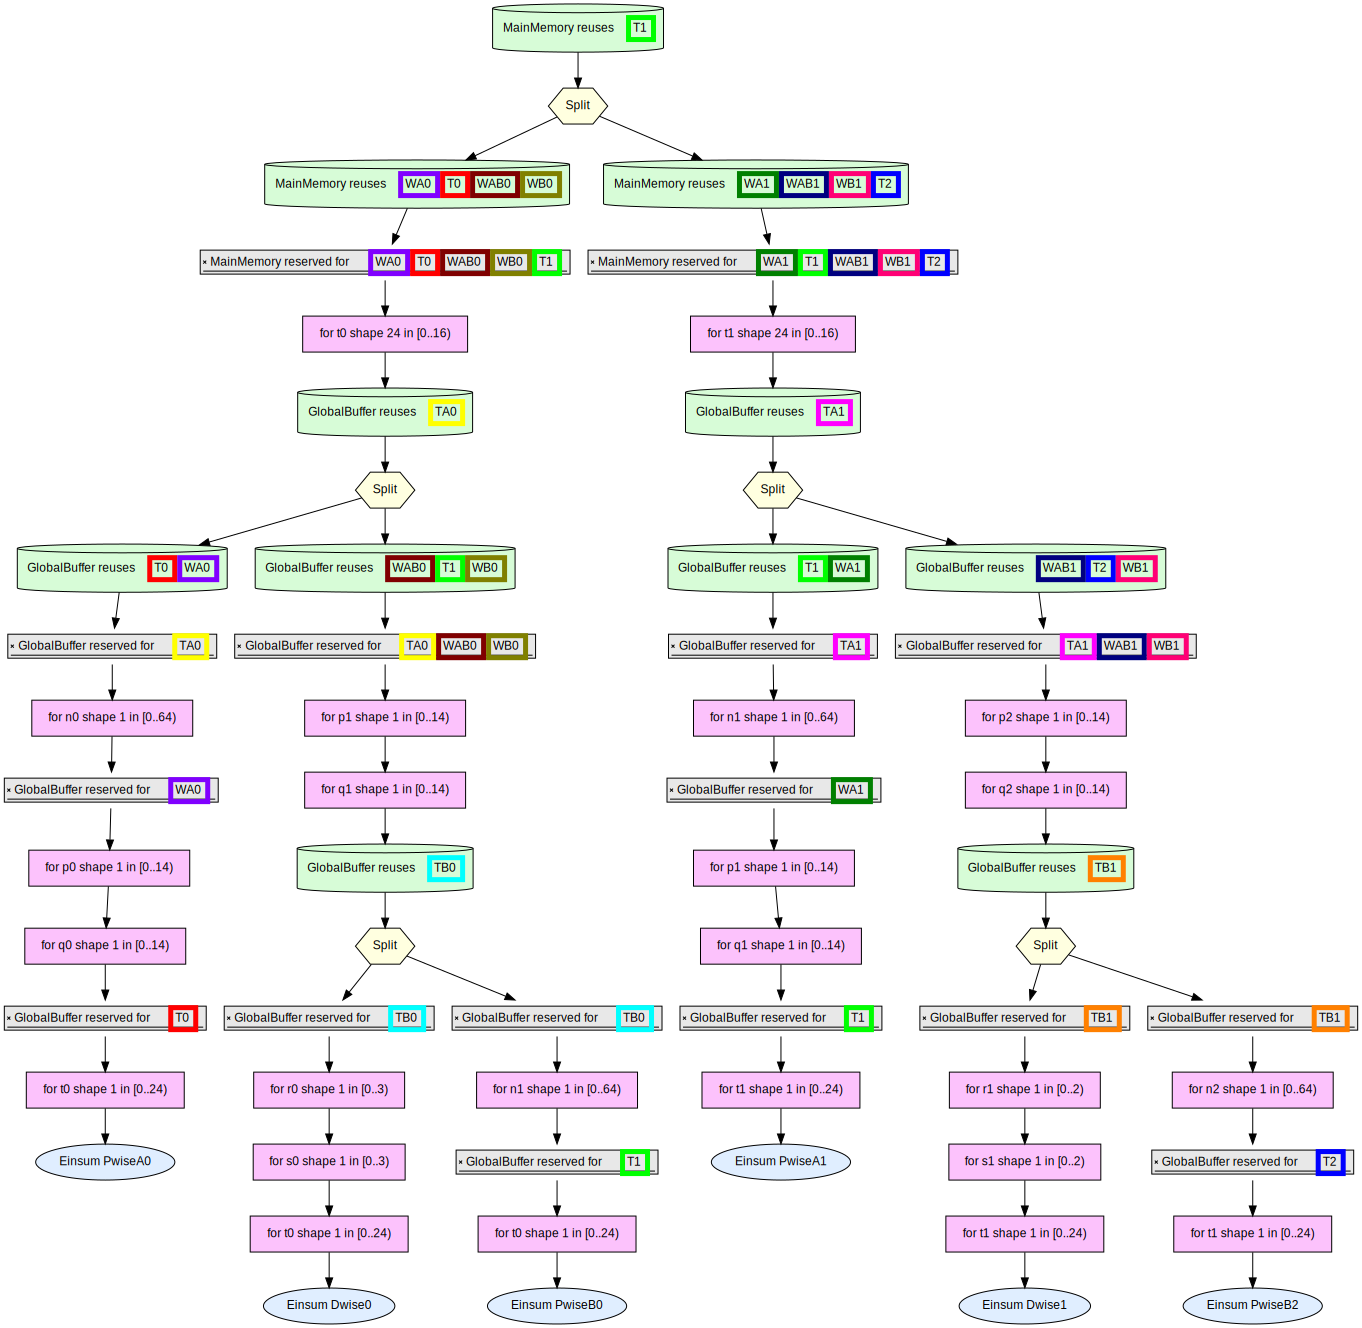

Loopforest mapping has occupancy 7921.0 and energy 1284352.0


In [6]:

# Grab the highest-occupancy pmapping with occupancy < 2e4 for looptree and loopforest

def get_pmapping(threshold, joined_pmappings):
    data = joined_pmappings.data
    data = data[data[OCCUPANCY] < threshold]
    data = data.sort_values(OCCUPANCY, ascending=False)
    return data.iloc[0]

looptree_pmapping = get_pmapping(8e3, joined_looptree)
loopforest_pmapping = get_pmapping(8e3, joined_loopforest)
einsum_names = list(pmappings.einsum2pmappings.keys()) # ["PwiseA0", "Dwise0", "PwiseB0", "PwiseA1", "Dwise1", "PwiseB2"]

from fastfusion.mapper.FFM.deprecate_maybe.visualization import make_mapping
from fastfusion.mapper.FFM._make_pmappings.mapper_multi_einsum import get_rank_variable_bounds_for_all_einsums

i = 0
rank_variable_bounds = get_rank_variable_bounds_for_all_einsums(spec)
mapping = make_mapping(looptree_pmapping, einsum_names=einsum_names, rank_variable_bounds=rank_variable_bounds)
from IPython.display import SVG
display(SVG(mapping.render()))
print(f'Looptree mapping has occupancy {looptree_pmapping[OCCUPANCY]} and energy {looptree_pmapping[ENERGY]}')

mapping = make_mapping(loopforest_pmapping, einsum_names=einsum_names, rank_variable_bounds=rank_variable_bounds)
from IPython.display import SVG
display(SVG(mapping.render()))
print(f'Loopforest mapping has occupancy {loopforest_pmapping[OCCUPANCY]} and energy {loopforest_pmapping[ENERGY]}')

# import matplotlib.pyplot as plt
# from fastfusion.visualization.ski_slope import make_staircase
# from paretoset import paretoset
# import numpy as np

# def plot_ski_slope(data, label, ax):
#     x = data[OCCUPANCY].to_numpy()
#     y = data[ENERGY].to_numpy()
#     data = np.stack([x, y]).T
#     mask = paretoset(data)
#     data = data[mask]
#     x = data[:, 0]
#     y = data[:, 1]
#     x, y = make_staircase(x, y)
#     ax.plot(x, y, label=label)

# fig, ax = plt.subplots()
# plot_ski_slope(data_tileflow, "TileFlow", ax)
# plot_ski_slope(data_looptree, "LoopTree", ax)
# plot_ski_slope(data_loopforest, "LoopForest", ax)

# ax.set_yscale("log")
# ax.set_xscale("log")
# ax.legend()as

# ax.set_xlabel("On-chip Memory Capacity (B)")
# ax.set_ylabel("Off-chip Accesses (B)")